In [1]:
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import glob

import h5py
import flammkuchen as fl
import seaborn as sns
from matplotlib.cm import ScalarMappable
import scipy
from scipy import stats

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

In [3]:
from megabouts_helper import labels_cat, color, color_bouts, cmp_bouts, color_ipsi_cont
from preprocess_helper import invert_tail, reshape_feature_array, invert_peaks_val, invert_fins

## Load data

In [4]:
save_figure_path = Path(r'\\portulab.synology.me\data\Kata\Figures_Paper\Figure_2\fig_2')

In [5]:
master_path = Path(r'\\portulab.synology.me\data\Kata\Processed_Data\tensor_data')

path_tensors = Path(master_path/ 'tensors'/ 'tensor_ipsi_contra_pos.h5')
path_features = Path(master_path/ 'features_ipsi_contra.csv')
master_path, path_features

(WindowsPath('//portulab.synology.me/data/Kata/Processed_Data/tensor_data'),
 WindowsPath('//portulab.synology.me/data/Kata/Processed_Data/tensor_data/features_ipsi_contra.csv'))

In [6]:
t_feature_vector_array = fl.load(master_path/ 'peaks_valleys'/  't_feature_vector_array.h5')
l_feature_vector_array = fl.load(master_path/ 'peaks_valleys'/  'l_feature_vector_array.h5')
r_feature_vector_array = fl.load(master_path/ 'peaks_valleys'/  'r_feature_vector_array.h5')

laterality = fl.load(master_path/ 'features'/'bout_laterality.h5')


In [7]:
max_n=9

reshaped_array, peaks_a_array, peaks_i_array, valleys_a_array, valleys_i_array = reshape_feature_array(t_feature_vector_array)
l_reshaped_array, l_peaks_a_array, l_peaks_i_array, l_valleys_a_array, l_valleys_i_array = reshape_feature_array(l_feature_vector_array)
r_reshaped_array, r_peaks_a_array, r_peaks_i_array, r_valleys_a_array, r_valleys_i_array = reshape_feature_array(r_feature_vector_array)

Reshaped array shape: (11063, 4, 9)
Reshaped array shape: (11063, 4, 9)
Reshaped array shape: (11063, 4, 9)


In [8]:
### tail, fin 1, fin 2, left eye, right eye

traces =  fl.load(path_tensors)
traces.shape

(11063, 3, 50)

In [9]:
tail = traces[:, 0, :]
ipsi_fin = traces[:, 1, :]
contra_fin = traces[:, 2, :]

In [10]:
cutoffs = invert_peaks_val(peaks_i_array, valleys_i_array, laterality)
cutoffs = cutoffs.astype(int)

### read in features

In [11]:
features = pd.read_csv(path_features)
features.head()

,Unnamed: 0.1,Unnamed: 0,exp,fish_id,bout_angle,cluster,frame_start,frame_end,bout_id_orig,mb_proba,...,ipsi_peak_vigor,contra_peak_vigor,ipsi_freqs,contra_freqs,ipsi_osc,contra_osc,ipsi_duration,contra_duration,ipsi_max_freqs,contra_max_freqs
0,0,0,13052024_visstim_2D_round,240513_f0,3.000171,0,18375,18410,78,0.806645,...,0.244681,0.164076,0.109756,0.105263,4,3,28.0,27.0,0.166667,0.166667
1,1,1,13052024_visstim_2D_round,240513_f0,1.649302,0,19461,19484,80,1.000000,...,0.163745,0.128555,0.119048,0.117647,2,2,19.0,15.0,0.250000,0.166667
2,2,2,13052024_visstim_2D_round,240513_f0,-0.861132,0,19661,19689,81,1.000000,...,0.219439,0.184779,0.104167,0.115385,3,2,27.0,16.0,0.125000,0.166667
3,3,3,13052024_visstim_2D_round,240513_f0,0.870591,0,20257,20292,84,1.000000,...,0.209418,0.198009,0.117647,0.117647,4,2,35.0,16.0,0.125000,0.166667
4,4,4,13052024_visstim_2D_round,240513_f0,2.231631,0,20824,20859,86,1.000000,...,0.220615,0.185247,0.103448,0.116667,3,3,22.0,23.0,0.125000,0.125000


In [12]:
clusters = features.cluster

In [13]:
ipsi_fin_values = features.ipsi_fin.values

In [14]:
# Define parameters
framerate = 200  # frames per second
num_frames = 50  # number of frames

# Calculate milliseconds per frame
ms_per_frame = 1000 / framerate  # 1 second = 1000 milliseconds
ms_per_frame

5.0

In [15]:
ipsi_tail_t_diff = (features.ipsi_t_0 - features.tail_t_0)*ms_per_frame
contra_tail_t_diff = (features.contra_t_0 -  features.tail_t_0)*ms_per_frame
ipsi_contra_t_diff = (features.ipsi_t_0 - features.contra_t_0)*ms_per_frame

## Plot movement starts for some examples

In [16]:
# Assuming tail, ipsi_fin, contra_fin, ipsi_tail_t_diff, contra_tail_t_diff, ipsi_contra_t_diff, and color_ipsi_cont are defined
n_samples = tail.shape[0]  # Example: 1000
cut = 10  # Example cutoff
alph=0.1
alph = 0.15
cycles=3
width = 0.35  # Width of the ba
lw=0.5
cm = 1/2.54  # centimeters in inches
f_size = 6
tick_label_size = f_size
dpi=600

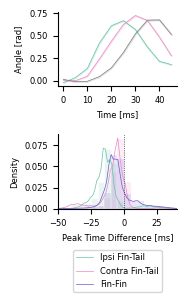

In [24]:

# Create a figure with a specific size
fig = plt.figure(figsize=(5*cm, 8.5*cm))
# Define the GridSpec layout, allocating a larger space to the top plot (3:1 ratio)
gs = GridSpec(4, 1, figure=fig)
ax1 = fig.add_subplot(gs[:2, 0])

ipsi_select = ipsi_fin[:n_samples, :cut]
mean_line = np.mean(ipsi_select, axis=0)
stderr = np.std(ipsi_select, axis=0) / np.sqrt(ipsi_select.shape[0])
ax1.plot(mean_line, c=color_ipsi_cont[0], label='Ipsilateral Fin', lw=lw)
ax1.fill_between(np.arange(0, cut, 1), 
                 mean_line - stderr, 
                 mean_line + stderr, 
                 color=color_ipsi_cont[0], 
                 alpha=0.2)

contra_select = contra_fin[:n_samples, :cut]
mean_line = np.mean(contra_select, axis=0)
stderr = np.std(contra_select, axis=0) / np.sqrt(contra_select.shape[0])
ax1.plot(mean_line, c=color_ipsi_cont[1], label='Contralateral Fin', lw=lw)
ax1.fill_between(np.arange(0, cut, 1), 
                 mean_line - stderr, 
                 mean_line + stderr, 
                 color=color_ipsi_cont[1], 
                 alpha=0.2)

# Top plot (bigger ratio)
tail_select = tail[:n_samples, :cut]
mean_line = np.mean(tail_select, axis=0)
stderr = np.std(tail_select, axis=0) / np.sqrt(tail_select.shape[0])
ax1.plot(mean_line, c='gray', label='Tail', lw=lw)
ax1.fill_between(np.arange(0, cut, 1), 
                 mean_line - stderr, 
                 mean_line + stderr, 
                 color='gray', 
                 alpha=0.2)

ax1.set_xticks(np.arange(0, cut, 2))
ax1.set_xticklabels(np.arange(0, cut, 2) * 5, fontsize=f_size)
ax1.set_xlabel('Time [ms]', fontsize=f_size)
ax1.set_ylabel('Angle [rad]', fontsize=f_size)

# ax1.legend(bbox_to_anchor=(0.5, 1.05), loc='lower center', shadow=False, ncol=2, fontsize=f_size, columnspacing=0.5)

# Bottom plot (smaller ratio)
ax2 = fig.add_subplot(gs[2:, 0])
bins = np.arange(-60, 60, 5)
sns.histplot(ipsi_tail_t_diff, color=color_ipsi_cont[0], edgecolor='w', alpha=alph, bins=bins, ax=ax2, stat='density')
sns.kdeplot(ipsi_tail_t_diff, color=color_ipsi_cont[0], linewidth=lw, ax=ax2,label='Ipsi Fin-Tail')
sns.histplot(contra_tail_t_diff, color=color_ipsi_cont[1], edgecolor='w', alpha=alph, bins=bins, ax=ax2, stat='density')
sns.kdeplot(contra_tail_t_diff, color=color_ipsi_cont[1], linewidth=lw, ax=ax2,label='Contra Fin-Tail')
sns.histplot(ipsi_contra_t_diff, color='slateblue', bins=bins, edgecolor='w', alpha=alph, ax=ax2,stat='density')
sns.kdeplot(ipsi_contra_t_diff, color='slateblue', linewidth=lw, ax=ax2, label='Fin-Fin')

ax2.axvline(0, c='k', ls=':', lw=lw)
ax2.set_xlabel('Peak Time Difference [ms]', fontsize=f_size)
ax2.set_ylabel('Density', fontsize=f_size)
ax2.set_xlim(-50, 40)
# ax2.set_yticks([0, 0.075])
# ax2.set_yticklabels([0, 0.075], fontsize=f_size)
ax2.legend(bbox_to_anchor=(0.5, -0.5), loc='upper center', shadow=False, ncol=1, fontsize=f_size, columnspacing=0.5)

ax1.tick_params(axis='both', which='major', labelsize=tick_label_size)
ax2.tick_params(axis='both', which='major', labelsize=tick_label_size)

for ax in [ax1,ax2]:
    ax.spines['bottom'].set_color('black')
    ax.spines['top'].set_color('black') 
    ax.spines['right'].set_color('black')
    ax.spines['left'].set_color('black')

    ax.xaxis.label.set_color('black')
    ax.yaxis.label.set_color('black')
    ax.title.set_color('black')

    ax.tick_params(axis='x', colors='black')
    ax.tick_params(axis='y', colors='black')

sns.despine(ax=ax1, top=True, right=True, left=False, bottom=False)
sns.despine(ax=ax2, top=True, right=True, left=False, bottom=False)
plt.tight_layout()
# Save the figure
plt.savefig(save_figure_path/'traces_starting_peak_times_hist_diff_combined.pdf', dpi=dpi)
plt.savefig(save_figure_path/'traces_starting_peak_times_hist_diff_combined.png', dpi=dpi)
